In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
%matplotlib inline

In [8]:
df = pd.read_csv ('Default.csv')
print(df)

     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


In [9]:
def get100(frame, diddefault):
    isdefault = frame['default'] == "Yes"
    if(not diddefault):
        isdefault = frame['default'] == "No"
    newframe = frame[isdefault]
    return newframe.sample(n=100)

def get200(frame):
    return pd.concat([get100(frame,True),get100(frame,False)])

In [10]:
all = df

isstudent = all['student'] == "Yes"
students = all[isstudent]
students

notstudent = all['student'] == "No"
notstudents = all[notstudent]
notstudents



,default,student,balance,income
0,No,No,729.526495,44361.625074
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
6,No,No,825.513331,24905.226578
...,...,...,...,...
9993,No,No,938.836241,56633.448744
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984


Text(0.5, 1.0, 'students and non-students')

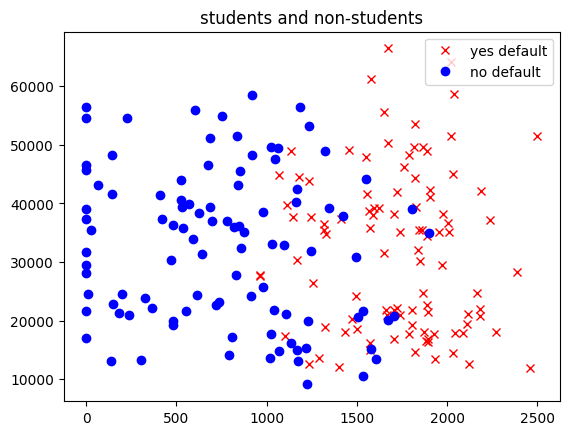

In [11]:
#making graphs

(a,b) = (get100(all, True), get100(all, False))
plt.plot(a.loc[:,"balance"], a.loc[:,"income"], color='red', marker='x',linestyle = "none", label = "yes default")
plt.plot(b.loc[:,"balance"], b.loc[:,"income"], color='blue', marker='o',linestyle = "none", label = "no default" )
plt.legend(loc="upper right")
plt.title("students and non-students")

Text(0.5, 1.0, 'nonstudents')

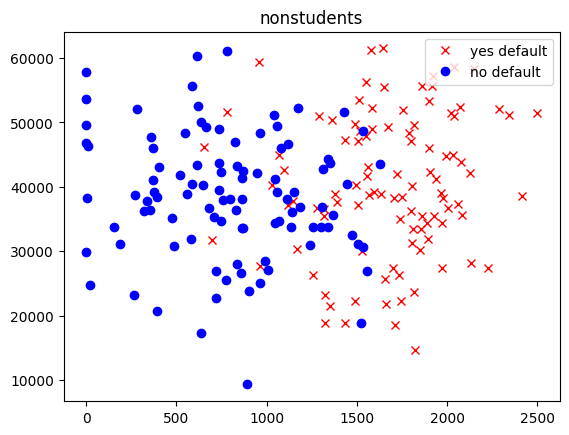

In [12]:
plt.clf()
a = get100(notstudents,True)
b = get100(notstudents,False)
plt.plot(a.loc[:,"balance"], a.loc[:,"income"], color='red', marker='x',linestyle = "none", label = "yes default")
plt.plot(b.loc[:,"balance"], b.loc[:,"income"], color='blue', marker='o',linestyle = "none", label = "no default" )
plt.legend(loc="upper right")
plt.title("nonstudents")

Text(0.5, 1.0, 'students')

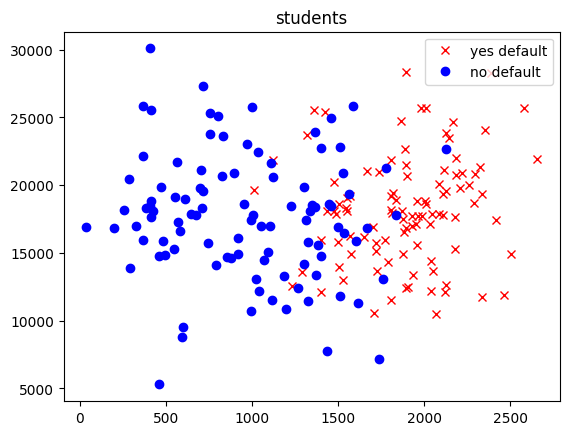

In [13]:
plt.clf()
a = get100(students,True)
b = get100(students,False)
plt.plot(a.loc[:,"balance"], a.loc[:,"income"], color='red', marker='x',linestyle = "none", label = "yes default")
plt.plot(b.loc[:,"balance"], b.loc[:,"income"], color='blue', marker='o',linestyle = "none", label = "no default" )
plt.legend(loc="upper right")
plt.title("students")

In [14]:
x1 = list(students["income"])
temp = list(students["default"])
temp
y1 = []
for l in temp:
    if(l == "Yes"):
        y1.append(1)
    else:
        y1.append(0)

In [15]:
import math

In [16]:
xp = np . arange( -20, 0, 30/20 )
yp = np . arange( .0, .010, .010/20)
zp = np . zeros( ( yp . size , xp . size ) )
(xp,yp) = np.meshgrid(xp,yp)
#

def rss(b1,b0,x_list,y_list):
    f = sum([0 - math.log(1 + math.exp(b0 + x_list[x] *b1)) + y_list[x]*(b0 + x_list[x] *b1)  for x in range(len(x_list))])
    return f




zp = np . zeros( ( yp . size , xp . size ) )
#
xp , yp = np . meshgrid( xp , yp )


for y in range (len(zp)):
    for x in range (len(zp[0])):
        zp[y][x] = rss(yp[y][x], xp[y][x], x1, y1)














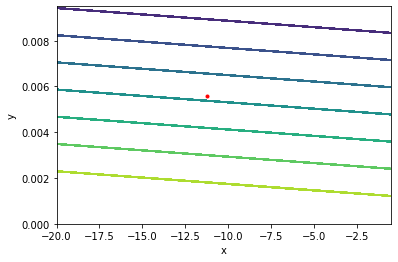

In [ ]:
#
plt.contour(xp, yp, zp)
plt.scatter( -11.2259, 0.005599, color = '#ff0000', marker = '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#xp is 1-d yp is 10d zp is 2-d

In [ ]:
from sklearn . linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier





people = all
people.dropna()
people = people.replace({'student': {'Yes': int(1), 'No': int(0)}})
people = people.replace({'default': {'Yes': int(1), 'No': int(0)}})


x = [people["balance"].tolist(),people["income"].tolist(),people["student"].tolist()]
y = people["default"].tolist()
# x['student'] = x['student'].map({'yes': 1, 'no': 0})
# y['default'] = x['default'].map({'yes': 1, 'no': 0})

x = np.array(x)
y = np.array(y)
x = x.transpose()
x.shape

(10000, 3)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# print(clf.intercept_,clf.coef_)

In [ ]:
results = clf.predict(x)

people['predicted_value'] = results


isstudent = people['student'] == 1
students = people[isstudent]
students

notstudent = people['student'] == 0
notstudents = people[notstudent]
notstudents


# people['expectedvalue'] = people.apply(lambda row: clf.predict(row.student, row.balance, row.income))

# for i in range(0,len(people)):
#     if clf.predict(x[i].reshape(1,-1)) == [False] and y[i] == [[True]]:
#         print(2)

,default,student,balance,income,predicted_value
0,0,0,729.526495,44361.625074,0
2,0,0,1073.549164,31767.138947,0
3,0,0,529.250605,35704.493935,0
4,0,0,785.655883,38463.495879,0
6,0,0,825.513331,24905.226578,0
...,...,...,...,...,...
9993,0,0,938.836241,56633.448744,0
9995,0,0,711.555020,52992.378914,0
9996,0,0,757.962918,19660.721768,0
9997,0,0,845.411989,58636.156984,0


In [ ]:
def getFalsePositives(frame):
    isdefault = (frame['default'] == 0)
    ispredicteddefault = (frame['predicted_value'] == 1)
    newframe = frame[isdefault]
    newerframe = newframe[ispredicteddefault]
    return newerframe

def getFalseNegatives(frame):
    isdefault = (frame['default'] == 1)
    ispredicteddefault = (frame['predicted_value'] == 0)
    newframe = frame[isdefault]
    newerframe = newframe[ispredicteddefault]
    return newerframe

/var/folders/b6/j42c2kfj1zscprc5d1534xph0000gn/T/ipykernel_8901/2834933067.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newerframe = newframe[ispredicteddefault]


Text(0.5, 1.0, 'False Negatives')

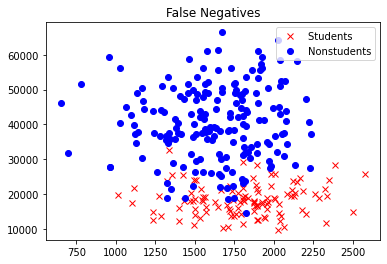

In [ ]:



(a,b) = (getFalseNegatives(students), getFalseNegatives(notstudents))
plt.plot(a.loc[:,"balance"], a.loc[:,"income"], color='red', marker='x',linestyle = "none", label = "Students ")
plt.plot(b.loc[:,"balance"], b.loc[:,"income"], color='blue', marker='o',linestyle = "none", label = "Nonstudents" )
plt.legend(loc="upper right")
plt.title("False Negatives")

/var/folders/b6/j42c2kfj1zscprc5d1534xph0000gn/T/ipykernel_8901/2834933067.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newerframe = newframe[ispredicteddefault]


Text(0.5, 1.0, 'False Positives')

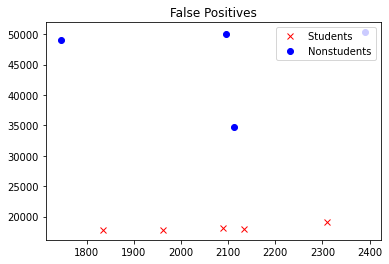

In [ ]:
(a,b) = (getFalsePositives(students), getFalsePositives(notstudents))
plt.plot(a.loc[:,"balance"], a.loc[:,"income"], color='red', marker='x',linestyle = "none", label = "Students ")
plt.plot(b.loc[:,"balance"], b.loc[:,"income"], color='blue', marker='o',linestyle = "none", label = "Nonstudents" )
plt.legend(loc="upper right")
plt.title("False Positives")